In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [4]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3002 - accuracy: 0.9132
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1441 - accuracy: 0.9571
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1075 - accuracy: 0.9678
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0884 - accuracy: 0.9729
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0765 - accuracy: 0.9768


In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc * 100:.2f}%')

313/313 [==============================] - 1s 2ms/step - loss: 0.0739 - accuracy: 0.9775
Test accuracy: 97.75%


In [8]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


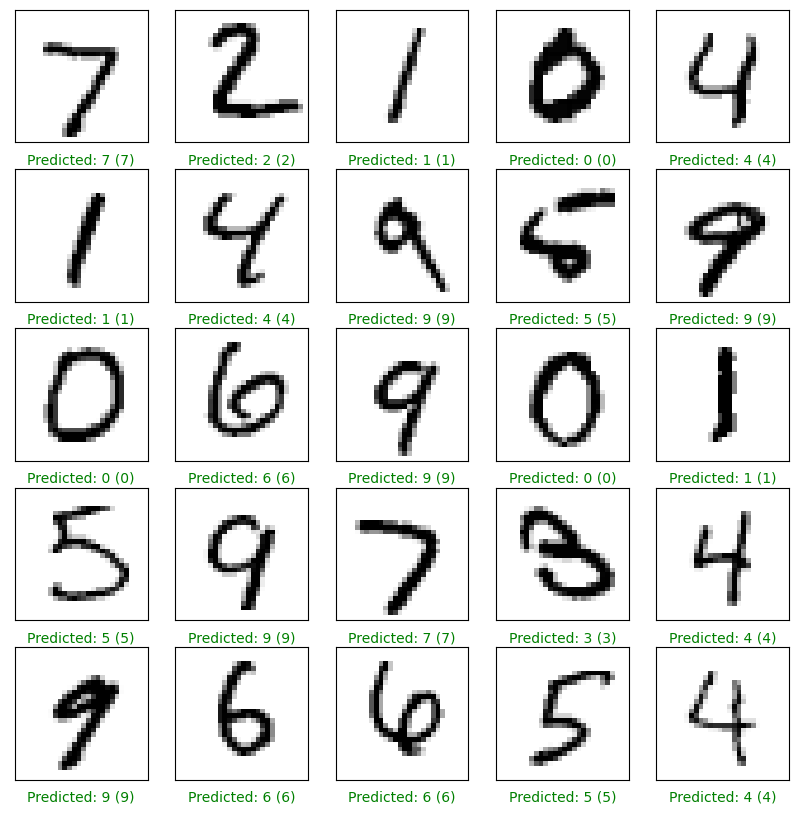

In [9]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = predictions[i].argmax()
    true_label = test_labels[i]
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel(f'Predicted: {predicted_label} ({true_label})', color=color)

plt.show()